In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Basic Image Processing

## Convolutions in 1D

Two numpy arrays have been created for you.

In [2]:
f = np.array([9., 8., 1., 6., 7., 2., 8., 6.])
h = np.array([2., 3., 1.])

(1 point) Calculate convolution f * h using `np.convolve()` without passing any optional parameter. Print the result.

In [3]:
g = np.convolve(f, h)
print(g)

[18. 43. 35. 23. 33. 31. 29. 38. 26.  6.]


(1 point) Recall from the slides that convolution is commutative. Show that this is the case by swapping the parameters, passing them to `np.convolve()` and print the result.

In [4]:
g = np.convolve(f, h)
print(g)

[18. 43. 35. 23. 33. 31. 29. 38. 26.  6.]


(4 points) Implement your own version of 1D convolution below. When you are indexing an element outside the boundary of an input array, pad it with zero.

In [5]:
def convolve(signal, kernel):
    result = np.zeros(len(signal) + len(kernel) - 1)
    for i in range(len(signal)):
        for j in range(len(kernel)):
            result[i + j] += signal[i] * kernel[j]
    return result

Now verify that your implementation gives the same results as Numpy.

In [6]:
print(convolve(f, h))
print(convolve(h, f))

[18. 43. 35. 23. 33. 31. 29. 38. 26.  6.]
[18. 43. 35. 23. 33. 31. 29. 38. 26.  6.]


## Smoothing Kernels

Load and display `data/sample.png`.

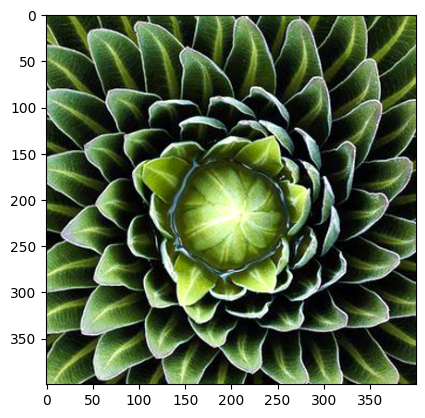

In [7]:
img_path = 'data/sample.png'
img = plt.imread(img_path)
plt.imshow(img)
plt.show()

(2 points) Create a 21x21 "box filter". It should have data type `float32` and the sum of all weights should be 1.

"Smooth" the sample image with this filter using `cv2.filter2D()` and display the result.

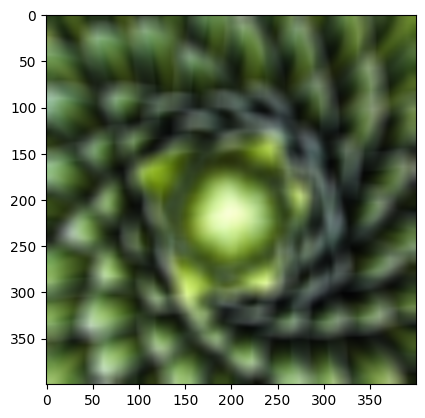

In [8]:
import numpy as np

# Create the box filter
kernel_size = 21
box_filter = np.ones((kernel_size, kernel_size), dtype=np.float32)
box_filter /= np.sum(box_filter)

# Smooth the sample image using cv2.filter2D()
smoothed_image = cv2.filter2D(img, -1, box_filter)

# Display the result
plt.imshow(smoothed_image)
plt.show()


Filtering with box filters produces blocky artifacts. Let's try filtering the same image with a Gaussian filter instead. The following code cell creates a gaussian filter for you.

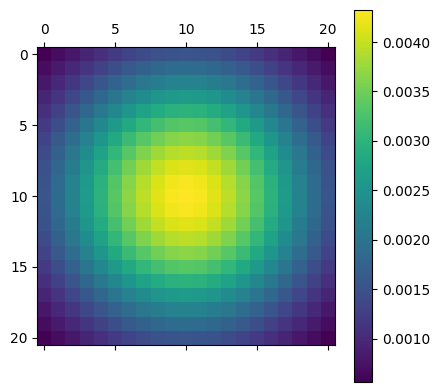

In [9]:
from scipy import signal

def gaussian_kernel(kernel_size, sigma):
    k1d = signal.windows.gaussian(kernel_size, std=sigma)
    k2d = np.outer(k1d, k1d)
    k2d /= np.sum(k2d)
    return k2d

kernel = gaussian_kernel(21, 7)
plt.matshow(kernel)
plt.colorbar()
plt.show()

(1 point) Apply the filter to the same test image and show the result.

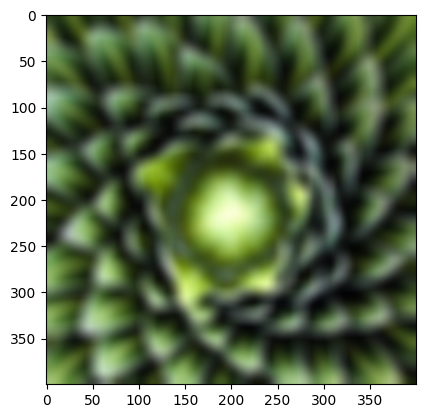

In [10]:
# Apply the filter to the test image
filtered_image = cv2.filter2D(img, -1, kernel)

# Display the result
plt.imshow(filtered_image)
plt.show()


## Median Filtering

Load and display `data/letter.png`.

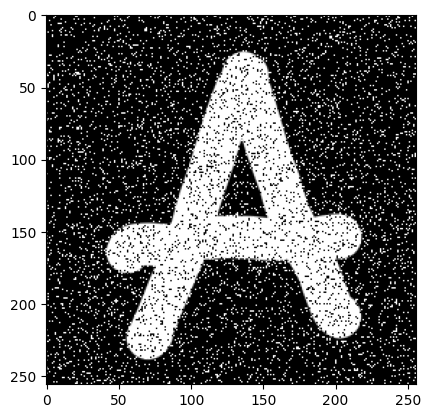

In [11]:
img_path = 'data/letter.png'
img = plt.imread(img_path)
plt.imshow(img, cmap='gray')
plt.show()

(1 point) Filter the image with a Gaussian kernel of your choice. Display the result.

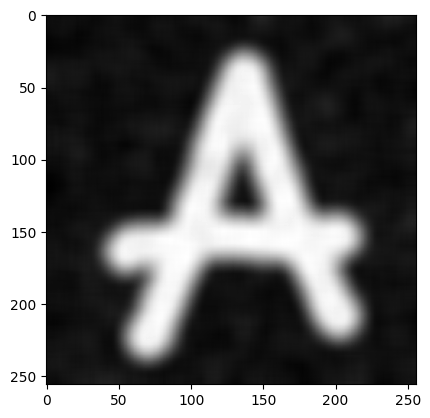

In [12]:
# Apply Gaussian filter to the image
filtered_image = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigmaX=7)

# Display the result
plt.imshow(filtered_image, cmap='gray')
plt.show()


(1 point) Is Gaussian filtering effective at removing the "salt-and-pepper" noise in the image?

In [13]:
# Type your answer below:
# YES, the image is blurred without the noise.

(4 points) Now, try implementing median filtering with kernel size 5x5. Apply it to the test image and show the result.

You should manipulate the pixel values yourself using `np.median()` and may not call existing functions such as `cv.medianBlur()` or `scipy.ndimage.median_filter()`. It's fine if your implementation is not very efficient and takes several seconds to run.

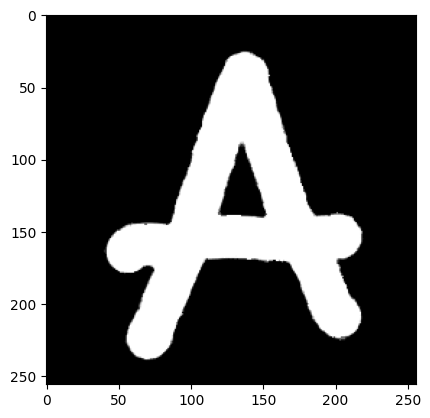

In [14]:
import numpy as np

def median_filter(image):
    height, width = image.shape
    filtered_image = np.zeros_like(image)
    
    for i in range(2, height - 2):
        for j in range(2, width - 2):
            neighbors = image[i-2:i+3, j-2:j+3]
            median_value = np.median(neighbors)
            filtered_image[i, j] = median_value
    
    return filtered_image

# Apply median filtering to the test image
filtered_image = median_filter(img)

# Display the result
plt.imshow(filtered_image, cmap='gray')
plt.show()
